In [72]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
data=pd.read_csv("./xented.csv")

/usr/local/Cellar/ipython/7.8.0/libexec/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (13,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head(5)

,__v,_id,amount,apikey,blacklisted,callbackurl,clientid,createdAt,fraudflag,listedunder,...,transactiondata.paymentMethod.details.msisdn,transactiondata.paymentMethod.name,transactiondata.productDetails.category,transactiondata.productDetails.name,transactiondata.productDetails.productId,transactiondata.transactionDate,transactiondata.transactionId,transactionid,updatedAt,warning
0,0,5d8a39186f6cf100174d6f23,-2000,42913703-bee9-4a1d-bc80-639fd7efcb72,False,http://xecurity.azurewebsites.net/api/permissi...,3a2e57f0-aca1-4014-a9f4-7a8894623382,2019-09-24T15:41:12.765Z,false,NaN,...,2.567848e+11,mobilemoney,NOT_SET,MTNDATABUNDLESUG,MTNDATABUNDLESUG,2019-09-24 15:41,B239463923F04B50A50925DA9462DE70-256701365960,B239463923F04B50A50925DA9462DE70-256701365960,2019-09-24T15:41:12.765Z,False
1,0,5d8a39ed6f6cf100174d6f24,-2000,42913703-bee9-4a1d-bc80-639fd7efcb72,False,http://xecurity.azurewebsites.net/api/permissi...,3a2e57f0-aca1-4014-a9f4-7a8894623382,2019-09-24T15:44:45.452Z,false,NaN,...,2.567584e+11,mobilemoney,NOT_SET,AIRTELDATABUNDLESUG,AIRTELDATABUNDLESUG,2019-09-24 15:44,112A97284047484B879A0D64393D7220-256701365960,112A97284047484B879A0D64393D7220-256701365960,2019-09-24T15:44:45.452Z,False
2,0,5d8a3ae00187770017a68224,-2000,42913703-bee9-4a1d-bc80-639fd7efcb72,False,http://xecurity.azurewebsites.net/api/permissi...,3a2e57f0-aca1-4014-a9f4-7a8894623382,2019-09-24T15:48:48.080Z,false,NaN,...,2.567584e+11,mobilemoney,NOT_SET,AIRTELDATABUNDLESUG,AIRTELDATABUNDLESUG,2019-09-24 15:48,0E8B8ABBE48E4F229E4AB8706942E0EB-256701365960,0E8B8ABBE48E4F229E4AB8706942E0EB-256701365960,2019-09-24T15:48:48.080Z,False
3,0,5d8a3aea0187770017a68225,-2001,42913703-bee9-4a1d-bc80-639fd7efcb72,False,http://xecurity.azurewebsites.net/api/permissi...,3a2e57f0-aca1-4014-a9f4-7a8894623382,2019-09-24T15:48:58.385Z,false,NaN,...,2.567584e+11,mobilemoney,NOT_SET,AIRTELDATABUNDLESUG,AIRTELDATABUNDLESUG,2019-09-24 15:48,C9D9D383BA6146D4803E9E56446E4E2D-256701365960,C9D9D383BA6146D4803E9E56446E4E2D-256701365960,2019-09-24T15:48:58.385Z,False
4,0,5d8a3afc45dd6b001b0d8942,-2001,42913703-bee9-4a1d-bc80-639fd7efcb72,False,http://xecurity.azurewebsites.net/api/permissi...,3a2e57f0-aca1-4014-a9f4-7a8894623382,2019-09-24T15:49:16.711Z,false,NaN,...,2.567584e+11,mobilemoney,NOT_SET,AIRTELDATABUNDLESUG,AIRTELDATABUNDLESUG,2019-09-24 15:49,4B93A5FE0DA7429887A71D4E04BB1FE0-256701365960,4B93A5FE0DA7429887A71D4E04BB1FE0-256701365960,2019-09-24T15:49:16.711Z,False


In [4]:
data.tail()

,__v,_id,amount,apikey,blacklisted,callbackurl,clientid,createdAt,fraudflag,listedunder,...,transactiondata.paymentMethod.details.msisdn,transactiondata.paymentMethod.name,transactiondata.productDetails.category,transactiondata.productDetails.name,transactiondata.productDetails.productId,transactiondata.transactionDate,transactiondata.transactionId,transactionid,updatedAt,warning
65302,0,5e6a5e6b1a639100109823b7,600,65a07d19-e0c7-4c4f-81dc-925e5a44c375,False,http://permissions.xente.co/api/permissions/3p...,f28473ce-34d8-496b-a2ab-9d8680404820,2020-03-12T16:08:11.905Z,false,NaN,...,NaN,wallet,AIRTIME,Airtel Airtime,AIRTELAIRTIMEUG,2020-03-12 16:08,853E7250D1694B4D8B66EC59B475CCCD-256701433663,853E7250D1694B4D8B66EC59B475CCCD-256701433663,2020-03-12T16:08:11.905Z,False
65303,0,5e6a5e8ec596ef0017499258,30,65a07d19-e0c7-4c4f-81dc-925e5a44c375,False,http://permissions.xente.co/api/permissions/3p...,f28473ce-34d8-496b-a2ab-9d8680404820,2020-03-12T16:08:46.735Z,false,NaN,...,NaN,wallet,TOPUP,Xente CashBack,CASHBACKUG,2020-03-12 16:08,EFD0A0B74DDA4B08BB4EF2E6436BE2D2-25677000000007,EFD0A0B74DDA4B08BB4EF2E6436BE2D2-25677000000007,2020-03-12T16:08:46.735Z,False
65304,0,5e6a5f1fc596ef0017499259,1000,65a07d19-e0c7-4c4f-81dc-925e5a44c375,False,http://permissions.xente.co/api/permissions/3p...,f28473ce-34d8-496b-a2ab-9d8680404820,2020-03-12T16:11:11.308Z,false,NaN,...,2.567053e+11,mobilemoney,TOPUP,Rehive Wallet Top Up,REHIVEWALLETTOPUPUG,2020-03-12 16:11,8759765F9843431197C07FDB6AB87D0C-256705313189,8759765F9843431197C07FDB6AB87D0C-256705313189,2020-03-12T16:11:11.308Z,False
65305,0,5e6a5fb1c80ec6001b15c4a8,2500,65a07d19-e0c7-4c4f-81dc-925e5a44c375,False,http://permissions.xente.co/api/permissions/3p...,f28473ce-34d8-496b-a2ab-9d8680404820,2020-03-12T16:13:37.237Z,false,NaN,...,NaN,wallet,AIRTIME,Airtel Airtime,AIRTELAIRTIMEUG,2020-03-12 16:12,02B333BFDC734D118C237C57A250DFEA-256701433663,02B333BFDC734D118C237C57A250DFEA-256701433663,2020-03-12T16:13:37.237Z,False
65306,0,5e6a5f811a639100109823b8,125,65a07d19-e0c7-4c4f-81dc-925e5a44c375,False,http://permissions.xente.co/api/permissions/3p...,f28473ce-34d8-496b-a2ab-9d8680404820,2020-03-12T16:12:49.214Z,false,NaN,...,NaN,wallet,TOPUP,Xente CashBack,CASHBACKUG,2020-03-12 16:12,5B2A6B61EDD343AF8032BB1B0F6CA6AB-25677000000007,5B2A6B61EDD343AF8032BB1B0F6CA6AB-25677000000007,2020-03-12T16:12:49.214Z,False


#### data.info()

In [6]:
data.describe()

,__v,amount,listedunder,transactiondata.amount.amount,transactiondata.deviceDetails.imei,transactiondata.paymentMethod.details.msisdn
count,65307.0,6.530700e+04,0.0,6.530700e+04,6.530700e+04,1.314500e+04
mean,0.0,1.066817e+04,NaN,2.150553e+03,2.622931e+06,2.572804e+11
std,0.0,9.755163e+04,NaN,9.810967e+04,5.679367e+07,3.480571e+10
min,0.0,-1.000000e+06,NaN,-8.458000e+06,0.000000e+00,2.317764e+11
25%,0.0,1.000000e+02,NaN,6.500000e+01,0.000000e+00,2.567519e+11
50%,0.0,1.000000e+03,NaN,1.000000e+03,0.000000e+00,2.567733e+11
75%,0.0,3.500000e+03,NaN,2.500000e+03,0.000000e+00,2.567814e+11
max,0.0,8.458000e+06,NaN,5.900000e+06,1.232343e+09,2.560778e+12


In [7]:
data.dtypes

__v                                               int64
_id                                              object
amount                                            int64
apikey                                           object
blacklisted                                        bool
callbackurl                                      object
clientid                                         object
createdAt                                        object
fraudflag                                        object
listedunder                                     float64
reviewed                                           bool
rulesflag                                          bool
transactiondata.accountDetails.creationDate      object
transactiondata.accountDetails.userId            object
transactiondata.amount.amount                   float64
transactiondata.amount.units                     object
transactiondata.customTransactionAttributes      object
transactiondata.deviceDetails.channelId         

In [8]:
data["fraudflag"].value_counts()

false     36448
0         27006
onhold     1794
true         59
Name: fraudflag, dtype: int64

In [9]:
print(data["blacklisted"])

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
65277    False
65278    False
65279    False
65280    False
65281    False
65282    False
65283    False
65284    False
65285    False
65286    False
65287    False
65288    False
65289    False
65290    False
65291    False
65292    False
65293    False
65294    False
65295    False
65296    False
65297    False
65298    False
65299    False
65300    False
65301    False
65302    False
65303    False
65304    False
65305    False
65306    False
Name: blacklisted, Length: 65307, dtype: bool


In [10]:
data["blacklisted"].value_counts()

False    65307
Name: blacklisted, dtype: int64

In [11]:
data["warning"].value_counts()

False    65307
Name: warning, dtype: int64

In [12]:
#data.blacklisted = data.blacklisted.astype(int)

In [13]:
data.head(3)

,__v,_id,amount,apikey,blacklisted,callbackurl,clientid,createdAt,fraudflag,listedunder,...,transactiondata.paymentMethod.details.msisdn,transactiondata.paymentMethod.name,transactiondata.productDetails.category,transactiondata.productDetails.name,transactiondata.productDetails.productId,transactiondata.transactionDate,transactiondata.transactionId,transactionid,updatedAt,warning
0,0,5d8a39186f6cf100174d6f23,-2000,42913703-bee9-4a1d-bc80-639fd7efcb72,False,http://xecurity.azurewebsites.net/api/permissi...,3a2e57f0-aca1-4014-a9f4-7a8894623382,2019-09-24T15:41:12.765Z,false,NaN,...,2.567848e+11,mobilemoney,NOT_SET,MTNDATABUNDLESUG,MTNDATABUNDLESUG,2019-09-24 15:41,B239463923F04B50A50925DA9462DE70-256701365960,B239463923F04B50A50925DA9462DE70-256701365960,2019-09-24T15:41:12.765Z,False
1,0,5d8a39ed6f6cf100174d6f24,-2000,42913703-bee9-4a1d-bc80-639fd7efcb72,False,http://xecurity.azurewebsites.net/api/permissi...,3a2e57f0-aca1-4014-a9f4-7a8894623382,2019-09-24T15:44:45.452Z,false,NaN,...,2.567584e+11,mobilemoney,NOT_SET,AIRTELDATABUNDLESUG,AIRTELDATABUNDLESUG,2019-09-24 15:44,112A97284047484B879A0D64393D7220-256701365960,112A97284047484B879A0D64393D7220-256701365960,2019-09-24T15:44:45.452Z,False
2,0,5d8a3ae00187770017a68224,-2000,42913703-bee9-4a1d-bc80-639fd7efcb72,False,http://xecurity.azurewebsites.net/api/permissi...,3a2e57f0-aca1-4014-a9f4-7a8894623382,2019-09-24T15:48:48.080Z,false,NaN,...,2.567584e+11,mobilemoney,NOT_SET,AIRTELDATABUNDLESUG,AIRTELDATABUNDLESUG,2019-09-24 15:48,0E8B8ABBE48E4F229E4AB8706942E0EB-256701365960,0E8B8ABBE48E4F229E4AB8706942E0EB-256701365960,2019-09-24T15:48:48.080Z,False


In [14]:
#data.fraudflag = data.fraudflag.astype(int)

In [15]:
data.columns

Index(['__v', '_id', 'amount', 'apikey', 'blacklisted', 'callbackurl',
       'clientid', 'createdAt', 'fraudflag', 'listedunder', 'reviewed',
       'rulesflag', 'transactiondata.accountDetails.creationDate',
       'transactiondata.accountDetails.userId',
       'transactiondata.amount.amount', 'transactiondata.amount.units',
       'transactiondata.customTransactionAttributes',
       'transactiondata.deviceDetails.channelId',
       'transactiondata.deviceDetails.deviceId',
       'transactiondata.deviceDetails.imei',
       'transactiondata.paymentMethod.details.msisdn',
       'transactiondata.paymentMethod.name',
       'transactiondata.productDetails.category',
       'transactiondata.productDetails.name',
       'transactiondata.productDetails.productId',
       'transactiondata.transactionDate', 'transactiondata.transactionId',
       'transactionid', 'updatedAt', 'warning'],
      dtype='object')

In [16]:
#data=pd.read_csv("./xented.csv", header = None, 
                  # names = ["Age", "Operation_year", "axil_nodes_det",
                           #"Surv_status"])

In [17]:
train=data[["amount", "fraudflag"]]

In [18]:
#train["Account"]=train["TransactionId"].apply(lambda x:x.split("-")[1])
#train["time"]=pd.to_datetime(train["TransactionStartTime"])
#train=train.drop(["TransactionId","TransactionStartTime"],axis=1)

In [19]:
data.head(2)

,__v,_id,amount,apikey,blacklisted,callbackurl,clientid,createdAt,fraudflag,listedunder,...,transactiondata.paymentMethod.details.msisdn,transactiondata.paymentMethod.name,transactiondata.productDetails.category,transactiondata.productDetails.name,transactiondata.productDetails.productId,transactiondata.transactionDate,transactiondata.transactionId,transactionid,updatedAt,warning
0,0,5d8a39186f6cf100174d6f23,-2000,42913703-bee9-4a1d-bc80-639fd7efcb72,False,http://xecurity.azurewebsites.net/api/permissi...,3a2e57f0-aca1-4014-a9f4-7a8894623382,2019-09-24T15:41:12.765Z,false,NaN,...,2.567848e+11,mobilemoney,NOT_SET,MTNDATABUNDLESUG,MTNDATABUNDLESUG,2019-09-24 15:41,B239463923F04B50A50925DA9462DE70-256701365960,B239463923F04B50A50925DA9462DE70-256701365960,2019-09-24T15:41:12.765Z,False
1,0,5d8a39ed6f6cf100174d6f24,-2000,42913703-bee9-4a1d-bc80-639fd7efcb72,False,http://xecurity.azurewebsites.net/api/permissi...,3a2e57f0-aca1-4014-a9f4-7a8894623382,2019-09-24T15:44:45.452Z,false,NaN,...,2.567584e+11,mobilemoney,NOT_SET,AIRTELDATABUNDLESUG,AIRTELDATABUNDLESUG,2019-09-24 15:44,112A97284047484B879A0D64393D7220-256701365960,112A97284047484B879A0D64393D7220-256701365960,2019-09-24T15:44:45.452Z,False


In [20]:
data.shape

(65307, 30)

In [21]:
#train["weekday"]=pd.to_datetime(data["TransactionStartTime"]).dt.weekday
#train["hour"]=pd.to_datetime(data["TransactionStartTime"]).dt.hour

In [22]:
#train.groupby(["Account","ProviderId","ProductId","ChannelId","weekday","FraudResult"])["Amount"].mean().reset_index()

In [23]:
data["fraudflag"].value_counts()

false     36448
0         27006
onhold     1794
true         59
Name: fraudflag, dtype: int64

false     36448
0         27006
onhold     1794
true         59
Name: fraudflag, dtype: int64


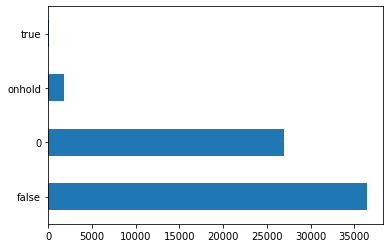

In [24]:
print(data["fraudflag"].value_counts())
data["fraudflag"].value_counts().plot("barh")

In [25]:
#print(data["ProductId"].value_counts())

In [26]:
#print(data["ChannelId"].value_counts())

In [27]:
data.isnull().sum()

__v                                                 0
_id                                                 0
amount                                              0
apikey                                              0
blacklisted                                         0
callbackurl                                         0
clientid                                            0
createdAt                                           0
fraudflag                                           0
listedunder                                     65307
reviewed                                            0
rulesflag                                           0
transactiondata.accountDetails.creationDate         0
transactiondata.accountDetails.userId               0
transactiondata.amount.amount                       0
transactiondata.amount.units                    65303
transactiondata.customTransactionAttributes     65303
transactiondata.deviceDetails.channelId             0
transactiondata.deviceDetail

In [28]:
data.head()

,__v,_id,amount,apikey,blacklisted,callbackurl,clientid,createdAt,fraudflag,listedunder,...,transactiondata.paymentMethod.details.msisdn,transactiondata.paymentMethod.name,transactiondata.productDetails.category,transactiondata.productDetails.name,transactiondata.productDetails.productId,transactiondata.transactionDate,transactiondata.transactionId,transactionid,updatedAt,warning
0,0,5d8a39186f6cf100174d6f23,-2000,42913703-bee9-4a1d-bc80-639fd7efcb72,False,http://xecurity.azurewebsites.net/api/permissi...,3a2e57f0-aca1-4014-a9f4-7a8894623382,2019-09-24T15:41:12.765Z,false,NaN,...,2.567848e+11,mobilemoney,NOT_SET,MTNDATABUNDLESUG,MTNDATABUNDLESUG,2019-09-24 15:41,B239463923F04B50A50925DA9462DE70-256701365960,B239463923F04B50A50925DA9462DE70-256701365960,2019-09-24T15:41:12.765Z,False
1,0,5d8a39ed6f6cf100174d6f24,-2000,42913703-bee9-4a1d-bc80-639fd7efcb72,False,http://xecurity.azurewebsites.net/api/permissi...,3a2e57f0-aca1-4014-a9f4-7a8894623382,2019-09-24T15:44:45.452Z,false,NaN,...,2.567584e+11,mobilemoney,NOT_SET,AIRTELDATABUNDLESUG,AIRTELDATABUNDLESUG,2019-09-24 15:44,112A97284047484B879A0D64393D7220-256701365960,112A97284047484B879A0D64393D7220-256701365960,2019-09-24T15:44:45.452Z,False
2,0,5d8a3ae00187770017a68224,-2000,42913703-bee9-4a1d-bc80-639fd7efcb72,False,http://xecurity.azurewebsites.net/api/permissi...,3a2e57f0-aca1-4014-a9f4-7a8894623382,2019-09-24T15:48:48.080Z,false,NaN,...,2.567584e+11,mobilemoney,NOT_SET,AIRTELDATABUNDLESUG,AIRTELDATABUNDLESUG,2019-09-24 15:48,0E8B8ABBE48E4F229E4AB8706942E0EB-256701365960,0E8B8ABBE48E4F229E4AB8706942E0EB-256701365960,2019-09-24T15:48:48.080Z,False
3,0,5d8a3aea0187770017a68225,-2001,42913703-bee9-4a1d-bc80-639fd7efcb72,False,http://xecurity.azurewebsites.net/api/permissi...,3a2e57f0-aca1-4014-a9f4-7a8894623382,2019-09-24T15:48:58.385Z,false,NaN,...,2.567584e+11,mobilemoney,NOT_SET,AIRTELDATABUNDLESUG,AIRTELDATABUNDLESUG,2019-09-24 15:48,C9D9D383BA6146D4803E9E56446E4E2D-256701365960,C9D9D383BA6146D4803E9E56446E4E2D-256701365960,2019-09-24T15:48:58.385Z,False
4,0,5d8a3afc45dd6b001b0d8942,-2001,42913703-bee9-4a1d-bc80-639fd7efcb72,False,http://xecurity.azurewebsites.net/api/permissi...,3a2e57f0-aca1-4014-a9f4-7a8894623382,2019-09-24T15:49:16.711Z,false,NaN,...,2.567584e+11,mobilemoney,NOT_SET,AIRTELDATABUNDLESUG,AIRTELDATABUNDLESUG,2019-09-24 15:49,4B93A5FE0DA7429887A71D4E04BB1FE0-256701365960,4B93A5FE0DA7429887A71D4E04BB1FE0-256701365960,2019-09-24T15:49:16.711Z,False


In [29]:
#data=data.drop(['createdAt', 'updatedAt','transactiondata.transactionId', 'transactionid'], axis=1)

In [30]:
#train=pd.concat([train.drop(categories,axis=1),pd.get_dummies(train[categories])],axis=1)

In [31]:
#train.head(5)


In [32]:
#[i for i in train.columns if ('REHIVEWALLETUG' in train[i].values)]

In [33]:
# importing the required modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [56]:
# removing the features FraudResult,ProductId,ChannelId from the input features set
x_basic = train["amount"]
y       = train["fraudflag"]

In [58]:
type(x_basic)

pandas.core.series.Series

In [59]:
# Spliting the data into test and train sets
x_basic_tr,x_basic_te,y_tr,y_te = train_test_split(x_basic,y,test_size =.33,random_state=1)
logreg_basic = LogisticRegression()

In [62]:
x_basic_tr.shape

(43755,)

In [65]:
# Training the basic logistic regression model with training set 
logreg_basic.fit(pd.DataFrame(x_basic_tr),y_tr)
#columns = [c for c in columns if c not in ["train_test", 'time']]

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#[i for i in data.columns if ('2020-03-09 05:08' in data[i].values)]

In [66]:
# Printing the coefficients
print("intercept ")
print(logreg_basic.intercept_)
print("")
print("coefficients ")
print(logreg_basic.coef_)

intercept 
[-1.08657549e-09  2.46723738e-01 -3.48451478e+00 -6.88878709e+00]

coefficients 
[[-3.76528365e-06]
 [-9.70885984e-09]
 [ 6.98507661e-07]
 [ 1.85153428e-06]]


In [68]:
# Predicting the output of the test cases using the algorithm created above
y_pre = logreg_basic.predict(pd.DataFrame(x_basic_te))

In [69]:
# Validating the algorithm using various Performance metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("")
a1 = accuracy_score(y_te,y_pre)
f1 = f1_score(y_te, y_pre, average="macro")
p1 = precision_score(y_te, y_pre, average="macro")
r1 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a1)
print("f1 score : ",f1)
print("precision score : ",p1)
print("recall score : ",r1)

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


accuracy score :  0.5512249443207127
f1 score :  0.23029700912566206
precision score :  0.38779582366589327
recall score :  0.27941176470588236


confusion_matrix
